In [31]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
import os
import sys
warnings.filterwarnings('ignore')

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir)

In [32]:
import graph_properties

# Part 1: Datos

In [57]:
X[0:,0:2]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [33]:
# Load data
iris = load_iris()
X = iris.data
Y = iris.target

print("Data shape:", X.shape)
print("Examples:\n", X[:10])
print("\nLabels shape", Y.shape)
print("Examples:\n", Y)
print("Class names:", iris.target_names)

Data shape: (150, 4)
Examples:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

Labels shape (150,)
Examples:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Class names: ['setosa' 'versicolor' 'virginica']


In [34]:
# Print more info
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

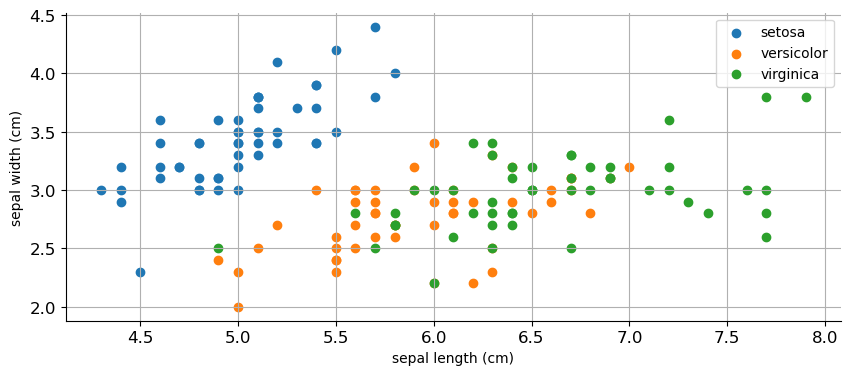

In [35]:
# Plot two features: petal length and petal width
plt.figure(figsize=(10, 4))
plt.scatter(X[Y==0, 0], X[Y==0, 1], label=iris.target_names[0])
plt.scatter(X[Y==1, 0], X[Y==1, 1], label=iris.target_names[1])
plt.scatter(X[Y==2, 0], X[Y==2, 1], label=iris.target_names[2])
plt.legend()
plt.grid(True)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

# Part 2: Perceptron

In [39]:
# Define class linear (step) perceptron
class LPerceptron:
  #constructor
  def __init__ (self):
    self.w = None
    self.b = None
  
  #activation function  
  def activation(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
  
  #predict on data
  def predict(self, X):
    Y = []
    for x in X:
      result = self.activation(x)
      Y.append(result)
    return np.array(Y)

  #train
  def fit(self, X, Y, n_epochs=1, lr=1, val_split=0.1, verbose=False):
    x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=val_split) #split train into train and val
    
    self.w = np.random.rand(X.shape[1])
    self.b = 0.0
    
    accuracy = np.zeros((2,))
    accuracy[0] = accuracy_score(y_train, self.predict(x_train))
    accuracy[1] = accuracy_score(y_val, self.predict(x_val))
    if verbose:
      print(f"Epoch: {0:3d} -- acc: {accuracy[0]:6.4f}, acc_val: {accuracy[1]:6.4f}")
    
    accuracy = np.zeros((n_epochs, 2))
    for epoch in range(n_epochs): #loop through epochs
      for x, y in zip(x_train, y_train):  #loop through samples
        y_hat = self.activation(x)
        d_err = y - y_hat
        self.w = self.w + lr * d_err * x  #LA
        self.b = self.b + lr * d_err      #LB
      accuracy[epoch, 0] = accuracy_score(y_train, self.predict(x_train))
      accuracy[epoch, 1] = accuracy_score(y_val, self.predict(x_val))
      if verbose:
        print(f"Epoch: {epoch+1:3d} -- acc: {accuracy[epoch, 0]:6.4f}, acc_val: {accuracy[epoch, 1]:6.4f}")
        
    return accuracy

In [40]:
# == Q2: ==
# Explica qué sucede en las líneas comentadas como #LA y #LB.
# ¿Qué significa cada térmido de las ecuaciones?
# ¿Por qué las expresiones contienen el término "d_err"?
# ¿Por qué la expresión en #LA contiene la variable de entrada "x"?
# ¿Cuántas iteraciones suceden en el loop interno del método fit?

In [41]:
# Create a model and train it for 50 epochs
perceptron = LPerceptron()
acc_history = perceptron.fit(x_train, y_train, n_epochs=50, lr=0.00001, val_split=0.1, verbose=True)
# Encuentra el mejor learning rate lr

Epoch:   0 -- acc: 0.3223, acc_val: 0.3571
Epoch:   1 -- acc: 0.3223, acc_val: 0.3571
Epoch:   2 -- acc: 0.3223, acc_val: 0.3571
Epoch:   3 -- acc: 0.3223, acc_val: 0.3571
Epoch:   4 -- acc: 0.3223, acc_val: 0.3571
Epoch:   5 -- acc: 0.3223, acc_val: 0.3571
Epoch:   6 -- acc: 0.3223, acc_val: 0.3571
Epoch:   7 -- acc: 0.3223, acc_val: 0.3571
Epoch:   8 -- acc: 0.3223, acc_val: 0.3571
Epoch:   9 -- acc: 0.3223, acc_val: 0.3571
Epoch:  10 -- acc: 0.3223, acc_val: 0.3571
Epoch:  11 -- acc: 0.3223, acc_val: 0.3571
Epoch:  12 -- acc: 0.3223, acc_val: 0.3571
Epoch:  13 -- acc: 0.3223, acc_val: 0.3571
Epoch:  14 -- acc: 0.3223, acc_val: 0.3571
Epoch:  15 -- acc: 0.3223, acc_val: 0.3571
Epoch:  16 -- acc: 0.3223, acc_val: 0.3571
Epoch:  17 -- acc: 0.3223, acc_val: 0.3571
Epoch:  18 -- acc: 0.3223, acc_val: 0.3571
Epoch:  19 -- acc: 0.3223, acc_val: 0.3571
Epoch:  20 -- acc: 0.3223, acc_val: 0.3571
Epoch:  21 -- acc: 0.3223, acc_val: 0.3571
Epoch:  22 -- acc: 0.3223, acc_val: 0.3571
Epoch:  23 

In [43]:
# Making predictions on test data
y_test_hat = perceptron.predict(x_test)
print("Test acc:", accuracy_score(y_test_hat, y_test))

Test acc: 0.4


In [44]:
# Show the final values for the weights and bias
print("Weights:", perceptron.w)
print("bias:", perceptron.b)

Weights: [0.26524913 0.72328967 0.44867757 0.17563467]
bias: -1.0164395367051604e-20


In [55]:
x_train

array([[6.4, 3.2, 5.3, 2.3],
       [5.3, 3.7, 1.5, 0.2],
       [4.9, 2.5, 4.5, 1.7],
       [5. , 3.5, 1.3, 0.3],
       [6.5, 3. , 5.2, 2. ],
       [4.9, 3.1, 1.5, 0.2],
       [5.1, 3.5, 1.4, 0.3],
       [5.4, 3.9, 1.3, 0.4],
       [6. , 2.2, 5. , 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [6.4, 2.9, 4.3, 1.3],
       [5.5, 2.5, 4. , 1.3],
       [6.2, 3.4, 5.4, 2.3],
       [5.5, 2.3, 4. , 1.3],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [5.8, 2.6, 4. , 1.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.9, 3.6, 1.4, 0.1],
       [5.5, 2.4, 3.7, 1. ],
       [6.8, 3.2, 5.9, 2.3],
       [5.8, 2.8, 5.1, 2.4],
       [6.7, 3. , 5.2, 2.3],
       [5.1, 3.8, 1.9, 0.4],
       [5.5, 2.6, 4.4, 1.2],
       [6. , 2.2, 4. , 1. ],
       [6. , 3.4, 4.5, 1.6],
       [6.8, 2.8, 4.8, 1.4],
       [7.7, 3.8, 6.7, 2.2],
       [5.4, 3.4, 1.7, 0.2],
       [6. , 3. , 4.8, 1.8],
       [6.7, 3.1, 4.7, 1.5],
       [5.4, 3.7, 1.5, 0.2],
       [5. , 2.3, 3.3, 1. ],
       [6.9, 3

In [56]:
# == Q3: ==
# Corre el experimento anterior 100 veces (quizás quieras establecer verbose=False),
# y reporta el promedio +- desviación estándar obtenidos al final de la última época de cada corrida.
# Debes reportar 3 promedios: para training, validation, y test sets
# ¿Notas algún cambio significativo?
ACC = np.zeros((100, 3))
for ind in range(100):
  perceptron = LPerceptron()
  acc_history = perceptron.fit(x_train[0:,0:2], y_train, n_epochs=50, lr=0.001, val_split=0.1, verbose=False) # Completar aquí
  ACC[ind, 0], ACC[ind, 1] = acc_history[-1]
  y_test_hat = perceptron.predict(x_test)
  ACC[ind, 2] = accuracy_score(y_test_hat, y_test)
    
print(f"Training:\t {ACC[:, 0].mean():6.4f} +- {ACC[:, 0].std():6.4f}")
print(f"Validation:\t {ACC[:, 1].mean():6.4f} +- {ACC[:, 1].std():6.4f}")
print(f"Test:\t\t {ACC[:, 2].mean():6.4f} +- {ACC[:, 2].std():6.4f}")

ValueError: shapes (2,) and (4,) not aligned: 2 (dim 0) != 4 (dim 0)

In [21]:
# == Q4: ==
# Repite el experimento anterior pero ahora usando las 4 variables de los datos (en vez de sólo 2)
# ¿Hubo algún cambio significativo en los resultados obtenidos?
# ¿Por qué crees que fue esto?

X = iris.data[:100]   # Completar aquí
Y = iris.target[:100] # Completar aquí

print(X.shape)
print(Y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

ACC = np.zeros((100, 3))
for ind in range(100):
  perceptron = LPerceptron()
  acc_history = perceptron.fit(x_train, y_train, n_epochs=50, lr=0.001, val_split=0.1, verbose=False) # Completar aquí
  ACC[ind, 0], ACC[ind, 1] = acc_history[-1]
  y_test_hat = perceptron.predict(x_test)
  ACC[ind, 2] = accuracy_score(y_test_hat, y_test)
    
print(f"Training:\t {ACC[:, 0].mean():6.4f} +- {ACC[:, 0].std():6.4f}")
print(f"Validation:\t {ACC[:, 1].mean():6.4f} +- {ACC[:, 1].std():6.4f}")
print(f"Test:\t\t {ACC[:, 2].mean():6.4f} +- {ACC[:, 2].std():6.4f}")

AttributeError: 'DataFrame' object has no attribute 'data'

In [ ]:
# == Q5: ==
# Repite el experimento anterior pero ahora usando las 4 variables de las clases
# versicolor (1) y virginica (2).
# ¿Hubo algún cambio significativo en los resultados obtenidos?
# ¿Por qué crees que fue esto?
# ¿Por qué si modificamos los datos, seguimos usando las mismas etiquetas: Y = iris.target[:100]?

X = iris.data[50:]
Y = iris.target[:100]

print(X.shape)
print(Y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

ACC = np.zeros((100, 3))
for ind in range(100):
  perceptron = LPerceptron()
  acc_history = perceptron.fit(x_train, y_train, n_epochs=50, lr=0.001, val_split=0.1, verbose=False) # Completar aquí
  ACC[ind, 0], ACC[ind, 1] = acc_history[-1]
  y_test_hat = perceptron.predict(x_test)
  ACC[ind, 2] = accuracy_score(y_test_hat, y_test)
    
print(f"Training:\t {ACC[:, 0].mean():6.4f} +- {ACC[:, 0].std():6.4f}")
print(f"Validation:\t {ACC[:, 1].mean():6.4f} +- {ACC[:, 1].std():6.4f}")
print(f"Test:\t\t {ACC[:, 2].mean():6.4f} +- {ACC[:, 2].std():6.4f}")

(100, 4)
(100,)
Training:	 0.8606 +- 0.0663
Validation:	 0.8489 +- 0.1470
Test:		 0.9480 +- 0.0922


# Part 3: Non-linear (sigmoid) Perceptron

In [ ]:
# Completa el siguiente código del perceptron no lineal (sigmoide)

In [ ]:
# Define class perceptron
class Perceptron:
  #constructor
  def __init__ (self):
    self.W = None
    self.b = None
  
  #total neuron input
  def lin_sum(self, X):
    return np.dot(self.W, X) + self.b
  
  #activation (sigmoid)
  def sigmoid(self, s):
    return 1.0 / (1.0 + np.exp(-s))
  
  #derivative of activation (sigmoid)
  def d_sigmoid(self, s):
    return self.sigmoid(s) * (1.0 - self.sigmoid(s))
  
  #predict on data
  def predict(self, X):
    Y = []
    for x in X:
      s = self.lin_sum(x)
      y = self.sigmoid(s)
      Y.append(y)
    return np.array(Y)

  #train
  def fit(self, X, Y, n_epochs=1, lr=0.1, val_split=0.1, verbose=False):
    x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=val_split)
    
    self.W = np.random.rand(X.shape[1])
    self.b = 0.0
    
    accuracy = np.zeros((2,))
    accuracy[0] = accuracy_score(y_train, self.predict(x_train).round())
    accuracy[1] = accuracy_score(y_val, self.predict(x_val).round())
    if verbose:
      print(f"Epoch: {0:3d} -- acc: {accuracy[0]:6.4f}, acc_val: {accuracy[1]:6.4f}")
    
    accuracy = np.zeros((n_epochs, 2))
    for epoch in range(n_epochs): #loop through epochs
      for x, y in zip(x_train, y_train):  #loop through samples
        # Forward pass
        s = self.lin_sum(x)
        y_hat = self.sigmoid(s)
        # Backward pass
        d_err = y - y_hat
        self.W = self.W + ... # Completar aquí
        self.b = self.b + ... # Completar aquí
      accuracy[epoch, 0] = accuracy_score(y_train, self.predict(x_train).round())
      accuracy[epoch, 1] = accuracy_score(y_val, self.predict(x_val).round())
      if verbose:
        print(f"Epoch: {epoch+1:3d} -- acc: {accuracy[epoch, 0]:6.4f}, acc_val: {accuracy[epoch, 1]:6.4f}")
        
    return accuracy

In [ ]:
# == Q6: ==
# Repite el experimento anterior usando las 4 variables de las clases 
# versicolor (1) y virginica (2), pero ahora usando el Perceptron logístico.
# ¿Hubo algún cambio significativo en los resultados obtenidos?
# ¿Por qué crees que fue esto?

X = iris.data[50:]
Y = iris.target[:100]

print(X.shape)
print(Y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

ACC = np.zeros((100, 3))
for ind in range(100):
  perceptron = Perceptron()
  acc_history = perceptron.fit(x_train, y_train, n_epochs=50, lr=0.3, val_split=0.1, verbose=False) # Completar aquí
  ACC[ind, 0], ACC[ind, 1] = acc_history[-1]
  y_test_hat = perceptron.predict(x_test)
  ACC[ind, 2] = accuracy_score(y_test, y_test_hat.round())
    
print(f"Training:\t {ACC[:, 0].mean():6.4f} +- {ACC[:, 0].std():6.4f}")
print(f"Validation:\t {ACC[:, 1].mean():6.4f} +- {ACC[:, 1].std():6.4f}")
print(f"Test:\t\t {ACC[:, 2].mean():6.4f} +- {ACC[:, 2].std():6.4f}")

(100, 4)
(100,)
Training:	 0.9169 +- 0.0881
Validation:	 0.9222 +- 0.0988
Test:		 0.8930 +- 0.1451


# Part 4: Sklearn Perceptron

In [ ]:
# Manually divide train, val, y test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

In [ ]:
# Use perceptron from scikit-learn
from sklearn.linear_model import Perceptron
sk_perceptron = Perceptron(max_iter=50, eta0=0.003)
sk_perceptron.fit(x_train, y_train)

Perceptron(eta0=0.003, max_iter=50)

In [ ]:
# Print performance
print(f"Training:\t {sk_perceptron.score(x_train, y_train):.4f}")
print(f"Validation:\t {sk_perceptron.score(x_val, y_val):.4f}")
print(f"Test:\t\t {sk_perceptron.score(x_test, y_test):.4f}")

Training:	 1.0000
Validation:	 1.0000
Test:		 0.7000
